In [28]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

from sklearn.datasets import load_diabetes


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc


from sklearn.preprocessing import StandardScaler

In [4]:
diabetes = load_diabetes()

In [5]:
X, y = diabetes.data, diabetes.target

In [8]:
y_binary = (y > np.median(y)).astype(int)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.3, random_state=42
)

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Model 1

In [14]:
model = LogisticRegression(max_iter=200)

In [15]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [16]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 200,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [30]:
model.coef_

array([[ 0.10500243, -0.58724547,  0.67459032,  0.61835658, -0.32022822,
        -0.08939562, -0.52441695,  0.09787805,  0.62173009, -0.04851767]])

In [18]:
y_pred = model.predict(X_test)

In [19]:
y_pred

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1])

In [20]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7744360902255639

In [21]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        72
           1       0.75      0.77      0.76        61

    accuracy                           0.77       133
   macro avg       0.77      0.77      0.77       133
weighted avg       0.78      0.77      0.77       133



#Model 2

In [22]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[56 16]
 [14 47]]


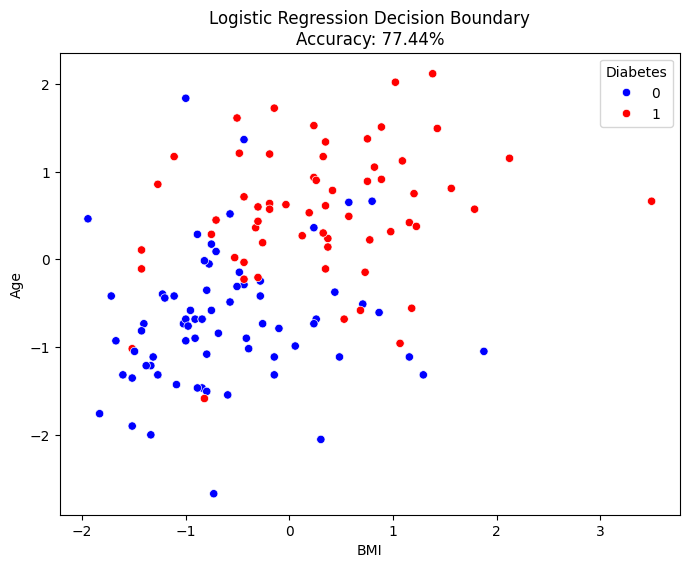

In [23]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_test[:, 2],
    y=X_test[:, 8],
    hue=y_test,
    palette={0: "blue", 1: "red"},
    marker="o",
)
plt.xlabel("BMI")
plt.ylabel("Age")
plt.title(
    "Logistic Regression Decision Boundary\nAccuracy: {:.2f}%".format(accuracy * 100)
)
plt.legend(title="Diabetes", loc="upper right")
plt.show()

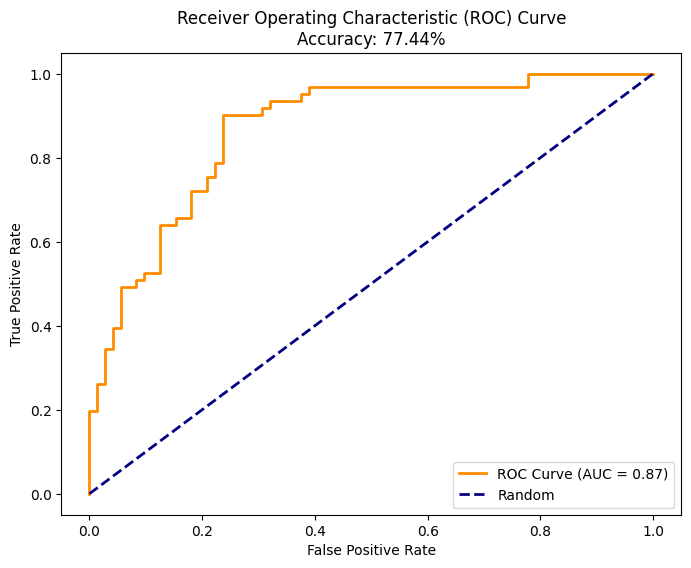

In [29]:
  
# Plot ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
 
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve\nAccuracy: {:.2f}%'.format(
    accuracy * 100))
plt.legend(loc="lower right")
plt.show()

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
classifier3=KNeighborsClassifier(n_neighbors=5)

In [43]:
classifier3.fit(X_train_Scaled,y_train)

KNeighborsClassifier()

In [44]:
classifier3.score(X_train_Scaled,y_train)

0.9747899159663865

In [45]:
classifier3.score(X_test_Scaled,y_test)

0.9491525423728814

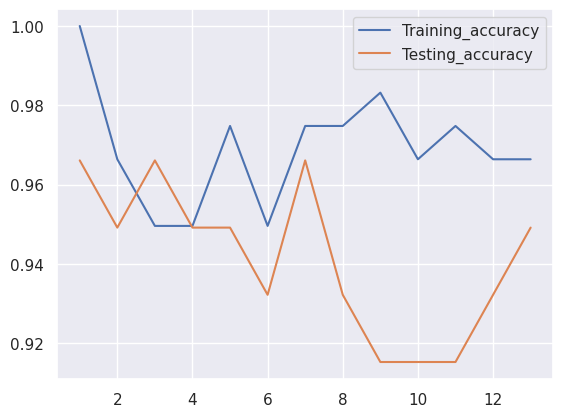

In [49]:
train_accuracy=[]
test_accuracy=[]
for i in range(1,14):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train_Scaled,y_train)
  train_accuracy.append(knn.score(X_train_Scaled,y_train))
  test_accuracy.append(knn.score(X_test_Scaled,y_test))

x=[i for i in range(1,14)]
plt.plot(x,train_accuracy,label='Training_accuracy')
plt.plot(x,test_accuracy,label='Testing_accuracy')
plt.legend()
plt.plot();

In [50]:
print(train_accuracy)
print(test_accuracy)

[1.0, 0.9663865546218487, 0.9495798319327731, 0.9495798319327731, 0.9747899159663865, 0.9495798319327731, 0.9747899159663865, 0.9747899159663865, 0.9831932773109243, 0.9663865546218487, 0.9747899159663865, 0.9663865546218487, 0.9663865546218487]
[0.9661016949152542, 0.9491525423728814, 0.9661016949152542, 0.9491525423728814, 0.9491525423728814, 0.9322033898305084, 0.9661016949152542, 0.9322033898305084, 0.9152542372881356, 0.9152542372881356, 0.9152542372881356, 0.9322033898305084, 0.9491525423728814]


In [ ]:
#Human activity recognition
# comparison between different models using logistic regression and knn.
